# Actividad


---
Por: Ángela Córdoba


---




In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU

In [3]:
df = pd.read_csv('bitcoin_usd.csv')
df.head()

,Unnamed: 0,open_USD,high_USD,low_USD,close_USD,volume
0,2021-01-30,34246.28,34933.00,32825.00,34218.54,43072
1,2021-01-29,33368.18,38531.90,31915.40,34252.20,231827
2,2021-01-28,30362.19,33783.98,29842.10,33364.86,92621
3,2021-01-27,32464.01,32557.29,29241.72,30366.15,95911
4,2021-01-26,32254.19,32921.88,30837.37,32467.77,84972


In [7]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace=True)
df = df.groupby(df.index).sum() # Sumamos los valores de los índices duplicados
df = df.sort_index() # Ordenamos los índices

# Se selecciona la serie de tiempo
timeseries = df['volume']

In [8]:
split_date = '2021-01-30'

# Dividir la serie de tiempo en entrenamiento y prueba
train_data, test_data = timeseries[:split_date], timeseries[split_date:]

print("train data", train_data)
print("test data", test_data)

train data Unnamed: 0
2018-05-07     33787
2018-05-08     25533
2018-05-09     25673
2018-05-10     25055
2018-05-11     48227
               ...  
2021-01-26     84972
2021-01-27     95911
2021-01-28     92621
2021-01-29    231827
2021-01-30     43072
Name: volume, Length: 1000, dtype: int64
test data Unnamed: 0
2021-01-30    43072
Name: volume, dtype: int64


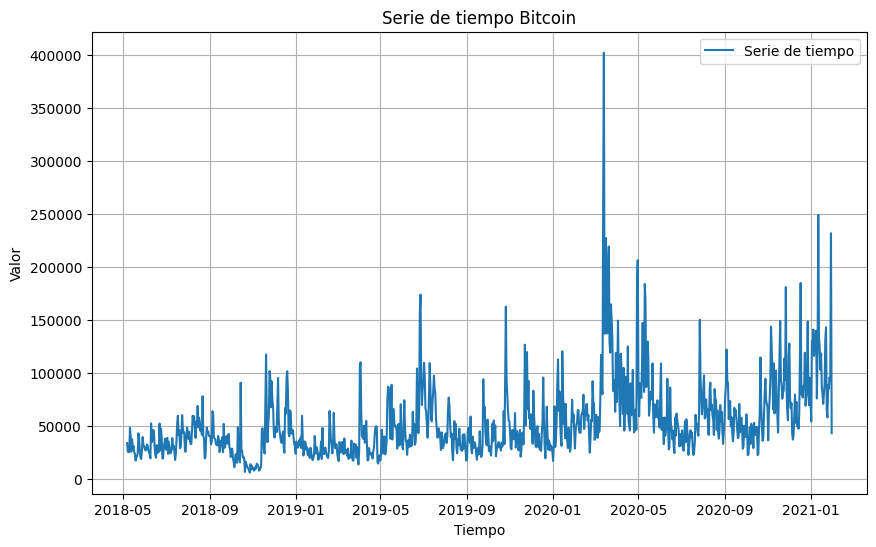

In [9]:
# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(timeseries, label='Serie de tiempo')
plt.title('Serie de tiempo Bitcoin')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

#Definimos el número de pasos de tiempo para la serie temporal
seq_length = 16

#Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

<ipython-input-11-be42e68f2330>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i+sequence_length])


In [12]:
X_train.shape

(984, 16)

In [13]:
# Contrucción del modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape,return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Crear el modelo GRU
def create_gru_model(input_shape):
    model = Sequential([
        GRU(50, activation='relu', input_shape=input_shape,return_sequences=True),
        GRU(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


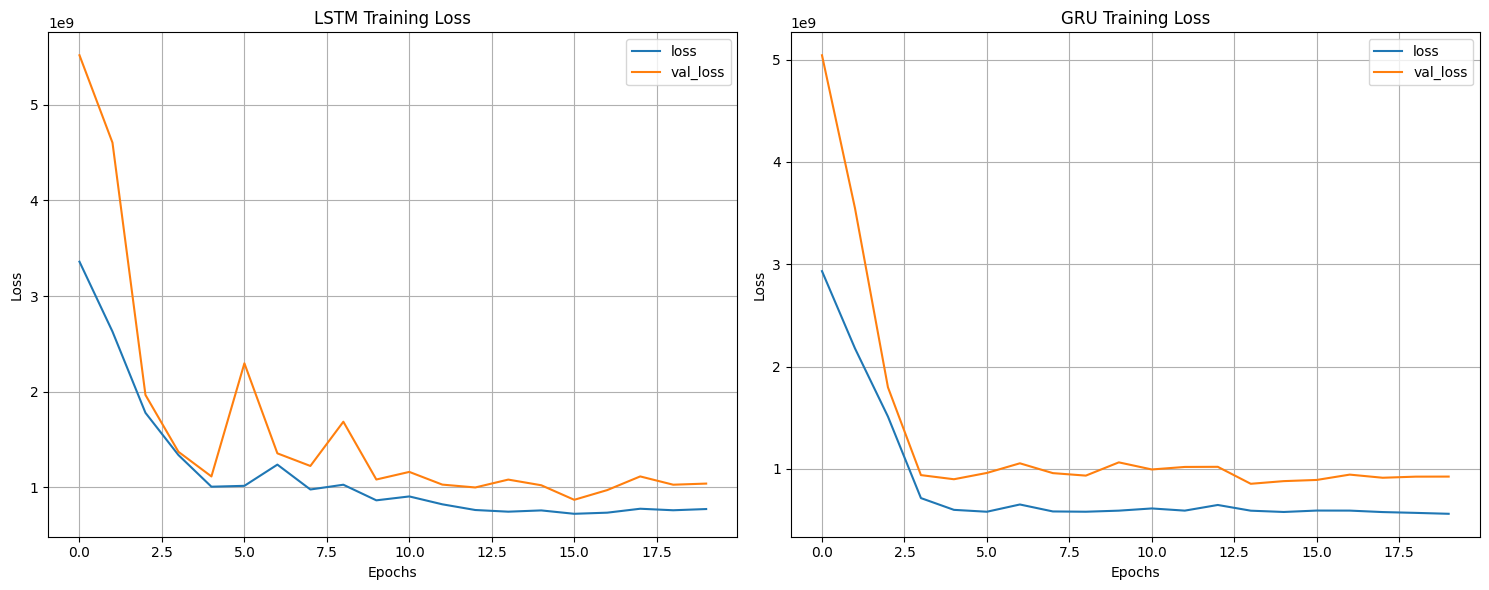

In [14]:
# Entrenamiento del modelo

input_shape = (X_train.shape[1],1)

# Crear y entrenar el modelo LSTM
lstm_model = create_lstm_model(input_shape)
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Crear y entrenar el modelo GRU
gru_model = create_gru_model(input_shape)
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Gráfica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
pd.DataFrame(lstm_history.history).plot(ax=ax1, grid=True)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('LSTM Training Loss')
pd.DataFrame(gru_history.history).plot(ax=ax2, grid=True)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('GRU Training Loss')

plt.tight_layout()
plt.show()

In [19]:
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length + 1):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length-1])
    return np.array(X).reshape(-1, sequence_length, 1), np.array(y)

In [25]:
# Evaluación del modelo
# CODE BY GEMINI
sequence_length = 16  # Same as used during training

# Ensure X_test is appropriately defined and not empty before creating the dataset
print("Shape of X_test before creating dataset:", X_test.shape)
# Check if X_test is empty and handle the case accordingly.
# If it's empty, you might need to load or generate the test data.
if X_test.size == 0:
    print("Error: X_test is empty. Please load or generate test data.")
    # Handle the empty X_test case here, e.g., load data or raise an exception
else:
    X_test_processed, y_test = create_dataset(X_test, sequence_length)

    # Check if y_test is empty
    if y_test.size == 0:
        print("Warning: y_test is empty. This might cause issues with model evaluation.")

    # Make predictions ONLY if X_test_processed is not empty
    if X_test_processed.size != 0:
        lstm_predictions = lstm_model.predict(X_test_processed)
        gru_predictions = gru_model.predict(X_test_processed)
        print("LSTM Predictions:", lstm_predictions)
        print("GRU Predictions:", gru_predictions)
    else:
        print("Cannot make predictions. X_test_processed is empty.")

Shape of X_test before creating dataset: (0, 16, 1)
Error: X_test is empty. Please load or generate test data.
